# Task 1

# Loading Data and Initial Exploration

#We will start by loading the data from the provided files and perform an initial exploration to understand the structure and content

In [1]:
import pandas as pd

# Load the datasets

telcom_data = pd.read_csv('C:\\Users\\hp\\digicrome data science\\project 5\\telcom_data.csv')

# Display the first few rows of the datasets to understand their structure

print(telcom_data.head())


      Bearer Id             Start  Start ms               End  End ms  \
0  1.310000e+19  04-04-2019 12:01     770.0  25-04-2019 14:35   662.0   
1  1.310000e+19  09-04-2019 13:04     235.0  25-04-2019 08:15   606.0   
2  1.310000e+19  09-04-2019 17:42       1.0  25-04-2019 11:58   652.0   
3  1.310000e+19  10-04-2019 00:31     486.0  25-04-2019 07:36   171.0   
4  1.310000e+19  12-04-2019 20:10     565.0  25-04-2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI Last Location Name  \
0  1823652.0  2.080000e+14   3.366496e+10  3.550000e+13           9.16E+15   
1  1365104.0  2.080000e+14   3.368185e+10  3.580000e+13            L77566A   
2  1361762.0  2.080000e+14   3.376063e+10  3.530000e+13            D42335A   
3  1321509.0  2.080000e+14   3.375034e+10  3.540000e+13            T21824A   
4  1089009.0  2.080000e+14   3.369980e+10  3.540000e+13            D88865A   

   ...  Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0  ...          158546

For Task 1, we will perform the following steps:

Identify the top 10 handsets used by the customers.

Identify the top 3 handset manufacturers.

Identify the top 5 handsets per top 3 handset manufacturers.

Aggregating user behavior data and performing EDA.

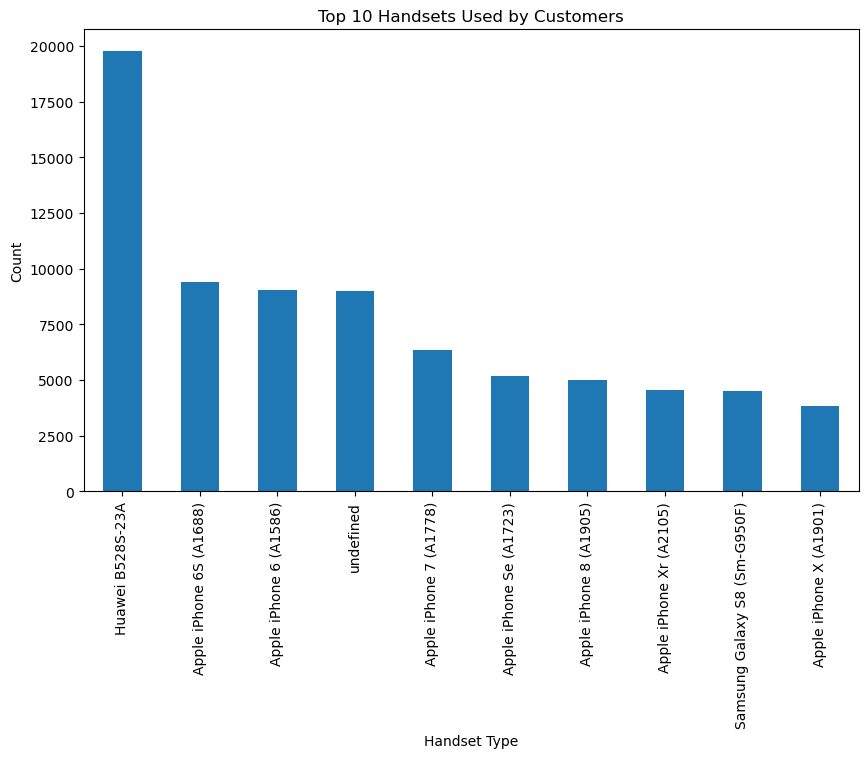

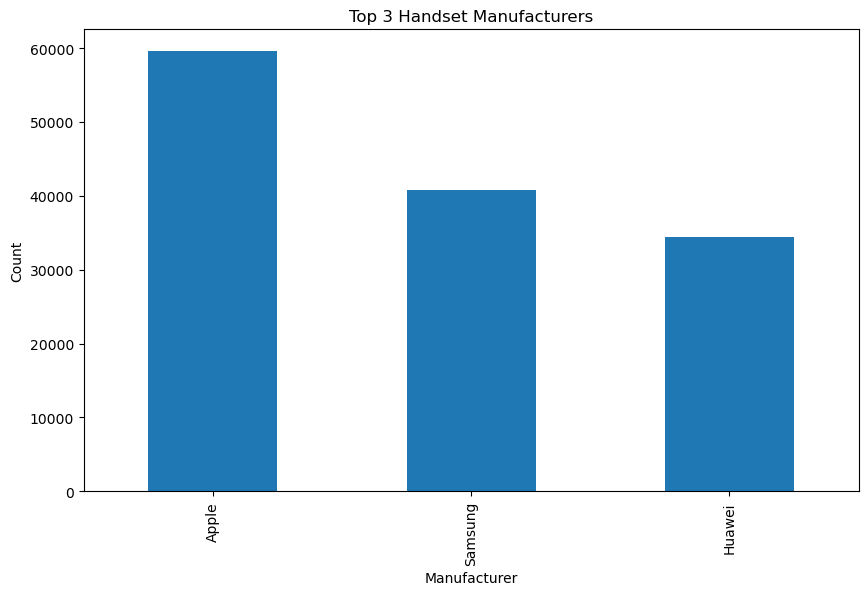

<Figure size 1000x600 with 0 Axes>

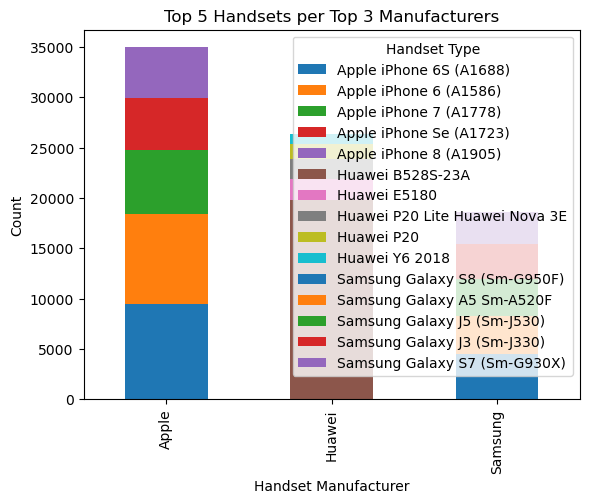

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Task 1: User Overview Analysis
# Step 1: Identify the top 10 handsets used by the customers
top_10_handsets = telcom_data['Handset Type'].value_counts().head(10)

# Step 2: Identify the top 3 handset manufacturers
top_3_manufacturers = telcom_data['Handset Manufacturer'].value_counts().head(3)

# Step 3: Identify the top 5 handsets per top 3 handset manufacturers
top_5_handsets_per_manufacturer = telcom_data[telcom_data['Handset Manufacturer'].isin(top_3_manufacturers.index)]
top_5_handsets_per_manufacturer = top_5_handsets_per_manufacturer.groupby('Handset Manufacturer')['Handset Type'].value_counts().groupby(level=0).head(5)

# Step 4: Aggregate user behavior data
user_behavior = telcom_data.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
}).reset_index()

# Plotting the results
plt.figure(figsize=(10, 6))
top_10_handsets.plot(kind='bar')
plt.title('Top 10 Handsets Used by Customers')
plt.xlabel('Handset Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
top_3_manufacturers.plot(kind='bar')
plt.title('Top 3 Handset Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
top_5_handsets_per_manufacturer.unstack().plot(kind='bar', stacked=True)
plt.title('Top 5 Handsets per Top 3 Manufacturers')
plt.xlabel('Handset Manufacturer')
plt.ylabel('Count')
plt.show()


In [3]:
# checking out shape of complete dataset
telcom_data.shape

(150001, 55)

In [4]:
# checking out how many columns we are having in our dataset
telcom_data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [5]:
#checking out how many object,intergar and boolean value we are having in our dataset
telcom_data.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

# Converting object columns into good format for the next process

In [6]:
import pandas as pd
import numpy as np

# Assuming 'Start' is the name of your column containing Unix timestamps
telcom_data['Start'] = pd.to_numeric(telcom_data['Start'], errors='coerce')
telcom_data['Start'] = telcom_data['Start'].fillna(0).astype(int)



In [7]:
# Assuming 'Start' is the name of your column containing Unix timestamps
telcom_data['End'] = pd.to_numeric(telcom_data['End'], errors='coerce')
telcom_data['End'] = telcom_data['End'].fillna(0).astype(int)



In [8]:
telcom_data.dtypes

Bearer Id                                   float64
Start                                         int32
Start ms                                    float64
End                                           int32
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

# Data Cleaning

In [9]:
#checking out how many missing values in number in each column we have having our dataset
#sum of missing value in each columns
telcom_data.isnull().sum().to_dict()

{'Bearer Id': 991,
 'Start': 0,
 'Start ms': 1,
 'End': 0,
 'End ms': 1,
 'Dur. (ms)': 1,
 'IMSI': 570,
 'MSISDN/Number': 1066,
 'IMEI': 572,
 'Last Location Name': 1153,
 'Avg RTT DL (ms)': 27829,
 'Avg RTT UL (ms)': 27812,
 'Avg Bearer TP DL (kbps)': 1,
 'Avg Bearer TP UL (kbps)': 1,
 'TCP DL Retrans. Vol (Bytes)': 88146,
 'TCP UL Retrans. Vol (Bytes)': 96649,
 'DL TP < 50 Kbps (%)': 754,
 '50 Kbps < DL TP < 250 Kbps (%)': 754,
 '250 Kbps < DL TP < 1 Mbps (%)': 754,
 'DL TP > 1 Mbps (%)': 754,
 'UL TP < 10 Kbps (%)': 792,
 '10 Kbps < UL TP < 50 Kbps (%)': 792,
 '50 Kbps < UL TP < 300 Kbps (%)': 792,
 'UL TP > 300 Kbps (%)': 792,
 'HTTP DL (Bytes)': 81474,
 'HTTP UL (Bytes)': 81810,
 'Activity Duration DL (ms)': 1,
 'Activity Duration UL (ms)': 1,
 'Dur. (ms).1': 1,
 'Handset Manufacturer': 572,
 'Handset Type': 572,
 'Nb of sec with 125000B < Vol DL': 97538,
 'Nb of sec with 1250B < Vol UL < 6250B': 92894,
 'Nb of sec with 31250B < Vol DL < 125000B': 93586,
 'Nb of sec with 37500B < 

# Feature Engineering to treat mising values


Separating numerical and object columns

In [10]:
numerical_columns = telcom_data.select_dtypes(include=['float']).columns

In [11]:
categorical_columns = telcom_data.select_dtypes(include='object').columns

Filling missing values of numerical columns with mean of the respective column

In [12]:
telcom_data[numerical_columns] = telcom_data[numerical_columns].fillna(telcom_data[numerical_columns].mean())

Filling missing values of object columns with mode of the respective column

In [13]:
telcom_data[categorical_columns] = telcom_data[categorical_columns].fillna(telcom_data[categorical_columns].mode().iloc[0])

In [14]:
telcom_data.isnull().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

# Converting categorical data into numeric columns

Applying lable encoding for the variable 

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Convert 'Last Location Name' from object to integer using label encoding
telcom_data['Last Location Name'] = label_encoder.fit_transform(telcom_data['Last Location Name'])

# Display the first few rows to verify the changes
print(telcom_data[['Last Location Name']].head())

   Last Location Name
0                   2
1               26316
2                8546
3               30656
4               15079


applying one-hot encoding

In [17]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity

# Fit and transform the 'Handset Manufacturer' and 'Handset Type' columns
encoded_columns = one_hot_encoder.fit_transform(telcom_data[['Handset Manufacturer', 'Handset Type']])

# Get the feature names for the encoded columns
encoded_column_names = one_hot_encoder.get_feature_names_out(['Handset Manufacturer', 'Handset Type'])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=encoded_column_names)

# Concatenate the original dataset (excluding the original categorical columns) with the encoded columns
telcom_data = pd.concat([telcom_data.drop(['Handset Manufacturer', 'Handset Type'], axis=1), encoded_df], axis=1)

# Display the first few rows to verify the changes
print(telcom_data.head())


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


      Bearer Id  Start  Start ms  End  End ms  Dur. (ms)          IMSI  \
0  1.310000e+19      0     770.0    0   662.0  1823652.0  2.080000e+14   
1  1.310000e+19      0     235.0    0   606.0  1365104.0  2.080000e+14   
2  1.310000e+19      0       1.0    0   652.0  1361762.0  2.080000e+14   
3  1.310000e+19      0     486.0    0   171.0  1321509.0  2.080000e+14   
4  1.310000e+19      0     565.0    0   954.0  1089009.0  2.080000e+14   

   MSISDN/Number          IMEI  Last Location Name  ...  \
0   3.366496e+10  3.550000e+13                   2  ...   
1   3.368185e+10  3.580000e+13               26316  ...   
2   3.376063e+10  3.530000e+13                8546  ...   
3   3.375034e+10  3.540000e+13               30656  ...   
4   3.369980e+10  3.540000e+13               15079  ...   

   Handset Type_Zte Mf190  Handset Type_Zte Mf259  Handset Type_Zte Mf626  \
0                     0.0                     0.0                     0.0   
1                     0.0                     

In [18]:
telcom_data.shape

(150001, 1617)

In [19]:
telcom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Columns: 1617 entries, Bearer Id to Handset Type_undefined
dtypes: float64(1614), int32(3)
memory usage: 1.8 GB


# Outliers

In [20]:
Q1 = telcom_data['Dur. (ms)'].quantile(0.25)
Q3 = telcom_data['Dur. (ms)'].quantile(0.75)
IQR = Q3-Q1
outliers = telcom_data[(telcom_data['Dur. (ms)'] < (Q1 - 1.5*IQR)) | (telcom_data['Dur. (ms)'] > (Q3 + 1.5*IQR))]

In [21]:
outliers

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Handset Type_Zte Mf190,Handset Type_Zte Mf259,Handset Type_Zte Mf626,Handset Type_Zte Racer Iii Mini Zte Switch X1 Bouygues Telecom Bs 402 Blade Q Mini Zte Blade G Pro,Handset Type_Zte Starxtrem By Sfr,Handset Type_Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809,Handset Type_Zyxel Communicat. Lte7460,Handset Type_Zyxel Communicat. Sbg3600,Handset Type_Zyxel Communicat. Zyxel Wah7706,Handset Type_undefined
0,1.310000e+19,0,770.0,0,662.0,1823652.0,2.080000e+14,3.366496e+10,3.550000e+13,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.310000e+19,0,235.0,0,606.0,1365104.0,2.080000e+14,3.368185e+10,3.580000e+13,26316,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.310000e+19,0,1.0,0,652.0,1361762.0,2.080000e+14,3.376063e+10,3.530000e+13,8546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.310000e+19,0,486.0,0,171.0,1321509.0,2.080000e+14,3.375034e+10,3.540000e+13,30656,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.310000e+19,0,565.0,0,954.0,1089009.0,2.080000e+14,3.369980e+10,3.540000e+13,15079,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127745,1.310000e+19,0,788.0,0,411.0,260043.0,2.080000e+14,3.369951e+10,3.550000e+13,15070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127753,7.350000e+18,0,817.0,0,444.0,253160.0,2.080000e+14,3.376087e+10,3.540000e+13,41611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127831,1.310000e+19,0,768.0,0,17.0,245667.0,2.080000e+14,3.376115e+10,8.610000e+13,9030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127842,1.310000e+19,0,398.0,0,513.0,248300.0,2.080000e+14,3.369826e+10,3.520000e+13,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 3000x600 with 0 Axes>

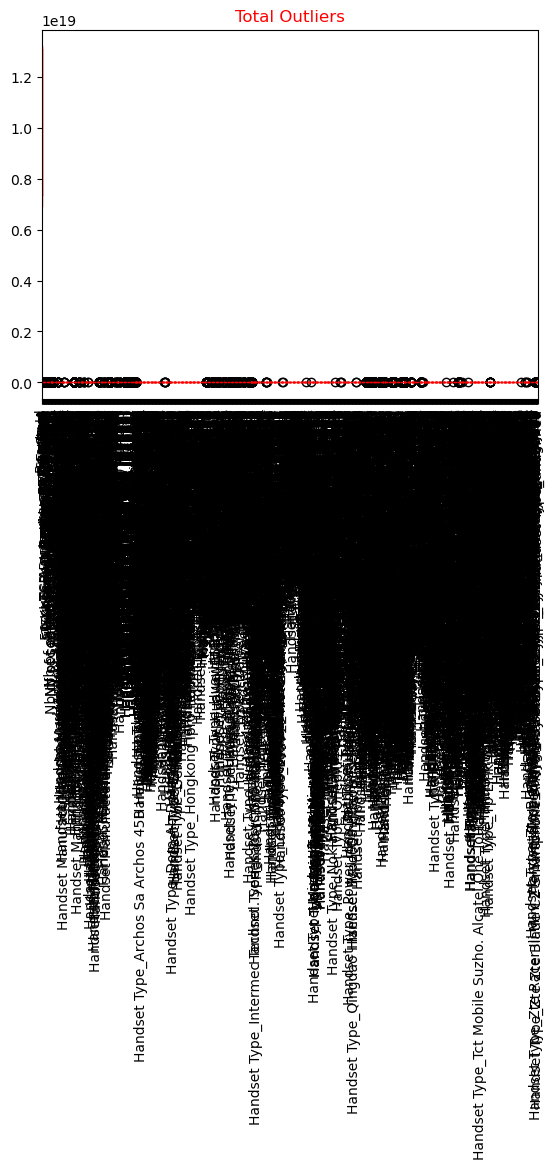

In [22]:
plt.figure(figsize = (15,3), dpi = 200)
outliers.plot(kind = 'box', color = 'red')
plt.xticks(rotation = 90)
plt.title('Total Outliers', color = 'red')
plt.show()

# Removing Outliers

In [23]:
telcom_data.drop(outliers.index)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Handset Type_Zte Mf190,Handset Type_Zte Mf259,Handset Type_Zte Mf626,Handset Type_Zte Racer Iii Mini Zte Switch X1 Bouygues Telecom Bs 402 Blade Q Mini Zte Blade G Pro,Handset Type_Zte Starxtrem By Sfr,Handset Type_Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809,Handset Type_Zyxel Communicat. Lte7460,Handset Type_Zyxel Communicat. Sbg3600,Handset Type_Zyxel Communicat. Zyxel Wah7706,Handset Type_undefined
92,1.310000e+19,0,467.0000,0,829.00000,243504.000000,2.080000e+14,3.368542e+10,3.560000e+13,15744,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,1.310000e+19,0,641.0000,0,444.00000,236570.000000,2.080000e+14,3.366132e+10,3.530000e+13,11932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,1.310000e+19,0,804.0000,0,199.00000,231780.000000,2.080000e+14,3.361513e+10,3.520000e+13,26024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,1.310000e+19,0,676.0000,0,176.00000,230839.000000,2.080000e+14,3.366495e+10,8.640000e+13,11942,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,7.350000e+18,0,810.0000,0,294.00000,238915.000000,2.080000e+14,3.366403e+10,3.590000e+13,11932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.280000e+18,0,451.0000,0,214.00000,81230.000000,2.080000e+14,3.365069e+10,3.550000e+13,5453,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149997,7.350000e+18,0,483.0000,0,187.00000,97970.000000,2.080000e+14,3.366345e+10,3.570000e+13,1227,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149998,1.310000e+19,0,283.0000,0,810.00000,98249.000000,2.080000e+14,3.362189e+10,3.570000e+13,33106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149999,1.310000e+19,0,696.0000,0,327.00000,97910.000000,2.080000e+14,3.361962e+10,8.620000e+13,26798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
telcom_data.head(2)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Handset Type_Zte Mf190,Handset Type_Zte Mf259,Handset Type_Zte Mf626,Handset Type_Zte Racer Iii Mini Zte Switch X1 Bouygues Telecom Bs 402 Blade Q Mini Zte Blade G Pro,Handset Type_Zte Starxtrem By Sfr,Handset Type_Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809,Handset Type_Zyxel Communicat. Lte7460,Handset Type_Zyxel Communicat. Sbg3600,Handset Type_Zyxel Communicat. Zyxel Wah7706,Handset Type_undefined
0,1.310000e+19,0,770.0,0,662.0,1823652.0,2.080000e+14,3.366496e+10,3.550000e+13,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.310000e+19,0,235.0,0,606.0,1365104.0,2.080000e+14,3.368185e+10,3.580000e+13,26316,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Task 2

# Describing Relevant Variables and Associated Data Types

In [25]:
# Describe variables and data types
description = telcom_data.dtypes
print(description)

Bearer Id                                                                                           float64
Start                                                                                                 int32
Start ms                                                                                            float64
End                                                                                                   int32
End ms                                                                                              float64
                                                                                                     ...   
Handset Type_Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809    float64
Handset Type_Zyxel Communicat. Lte7460                                                              float64
Handset Type_Zyxel Communicat. Sbg3600                                                              float64
Handset Type_Zyxel Communica

# Analyze Basic Metrics in the Dataset

In [26]:
# Basic metrics
basic_metrics = telcom_data.describe()
print(basic_metrics)


          Bearer Id     Start       Start ms       End         End ms  \
count  1.500010e+05  150001.0  150001.000000  150001.0  150001.000000   
mean   1.012554e+19       0.0     499.188200       0.0     498.800880   
std    2.869060e+18       0.0     288.610872       0.0     288.096693   
min    6.920000e+18       0.0       0.000000       0.0       0.000000   
25%    7.350000e+18       0.0     250.000000       0.0     251.000000   
50%    7.350000e+18       0.0     499.000000       0.0     500.000000   
75%    1.300000e+19       0.0     749.000000       0.0     750.000000   
max    1.320000e+19       0.0     999.000000       0.0     999.000000   

          Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
count  1.500010e+05  1.500010e+05   1.500010e+05  1.500010e+05   
mean   1.046086e+05  2.080000e+14   4.188017e+10  4.847427e+13   
std    8.103735e+04  2.129162e+10   2.437773e+12  2.237821e+13   
min    7.142000e+03  2.040000e+14   3.360100e+10  4.400000e+11   
25%    5.744

# Conduct Non-Graphical Univariate Analysis

In [27]:
# Dispersion parameters
dispersion_parameters = telcom_data.quantile([0.25, 0.5, 0.75])
print(dispersion_parameters)

         Bearer Id  Start  Start ms  End  End ms  Dur. (ms)          IMSI  \
0.25  7.350000e+18    0.0     250.0  0.0   251.0    57442.0  2.080000e+14   
0.50  7.350000e+18    0.0     499.0  0.0   500.0    86399.0  2.080000e+14   
0.75  1.300000e+19    0.0     749.0  0.0   750.0   132430.0  2.080000e+14   

      MSISDN/Number          IMEI  Last Location Name  ...  \
0.25   3.365151e+10  3.550000e+13              8480.0  ...   
0.50   3.366380e+10  3.570000e+13             16669.0  ...   
0.75   3.368473e+10  8.610000e+13             30214.0  ...   

      Handset Type_Zte Mf190  Handset Type_Zte Mf259  Handset Type_Zte Mf626  \
0.25                     0.0                     0.0                     0.0   
0.50                     0.0                     0.0                     0.0   
0.75                     0.0                     0.0                     0.0   

      Handset Type_Zte Racer Iii Mini Zte Switch X1 Bouygues Telecom Bs 402 Blade Q Mini Zte Blade G Pro  \
0.25         

# Conduct Graphical Univariate Analysis

For graphical analysis, you can use histograms for numerical variables and bar plots for categorical variables to visualize their distributions.

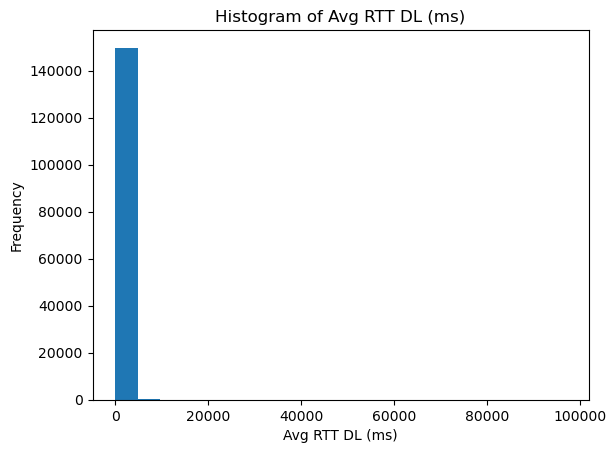

In [28]:
# Example for numerical variable
plt.hist(telcom_data['Avg RTT DL (ms)'], bins=20)
plt.xlabel('Avg RTT DL (ms)')
plt.ylabel('Frequency')
plt.title('Histogram of Avg RTT DL (ms)')
plt.show()


# Bivariate Analysis

we can use scatter plots to explore the relationship between each application and the total DL+UL data:

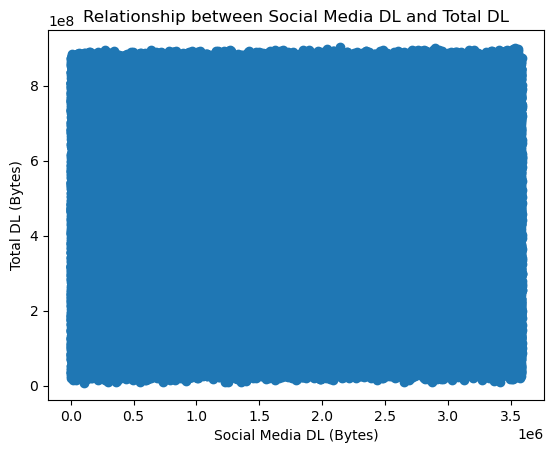

In [29]:
# Example for Bivariate Analysis
plt.scatter(telcom_data['Social Media DL (Bytes)'], telcom_data['Total DL (Bytes)'])
plt.xlabel('Social Media DL (Bytes)')
plt.ylabel('Total DL (Bytes)')
plt.title('Relationship between Social Media DL and Total DL')
plt.show()


# Variable Transformations



In [30]:
# Segment users into decile classes based on total duration
telcom_data['Decile_Class'] = pd.qcut(telcom_data['Dur. (ms)'], q=10, labels=False, duplicates='drop')

# Compute total data (DL+UL) per decile class
total_data_per_decile = telcom_data.groupby('Decile_Class')[['Total UL (Bytes)', 'Total DL (Bytes)']].sum()
print(total_data_per_decile)



              Total UL (Bytes)  Total DL (Bytes)
Decile_Class                                    
0                 6.156156e+11      6.823576e+12
1                 6.186717e+11      6.826179e+12
2                 6.170503e+11      6.861101e+12
3                 1.345381e+12      1.479644e+13
4                 5.067274e+11      5.582355e+12
5                 6.167848e+11      6.820036e+12
6                 6.157970e+11      6.801132e+12
7                 6.159194e+11      6.842822e+12
8                 6.162751e+11      6.843325e+12


This code segments users into decile classes based on total session duration and computes total data (DL+UL) per decile class.

# Correlation Analysis

In [31]:
# Compute correlation matrix
correlation_matrix = telcom_data[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']].corr()
print(correlation_matrix)


                         Social Media DL (Bytes)  Google DL (Bytes)  \
Social Media DL (Bytes)                 1.000000          -0.001954   
Google DL (Bytes)                      -0.001954           1.000000   
Email DL (Bytes)                        0.004745          -0.000039   
Youtube DL (Bytes)                     -0.001389           0.001760   
Netflix DL (Bytes)                     -0.001817           0.000548   
Gaming DL (Bytes)                       0.001018          -0.001421   
Other DL (Bytes)                        0.006126          -0.002557   

                         Email DL (Bytes)  Youtube DL (Bytes)  \
Social Media DL (Bytes)          0.004745           -0.001389   
Google DL (Bytes)               -0.000039            0.001760   
Email DL (Bytes)                 1.000000            0.001679   
Youtube DL (Bytes)               0.001679            1.000000   
Netflix DL (Bytes)               0.001351            0.001202   
Gaming DL (Bytes)                0.000050

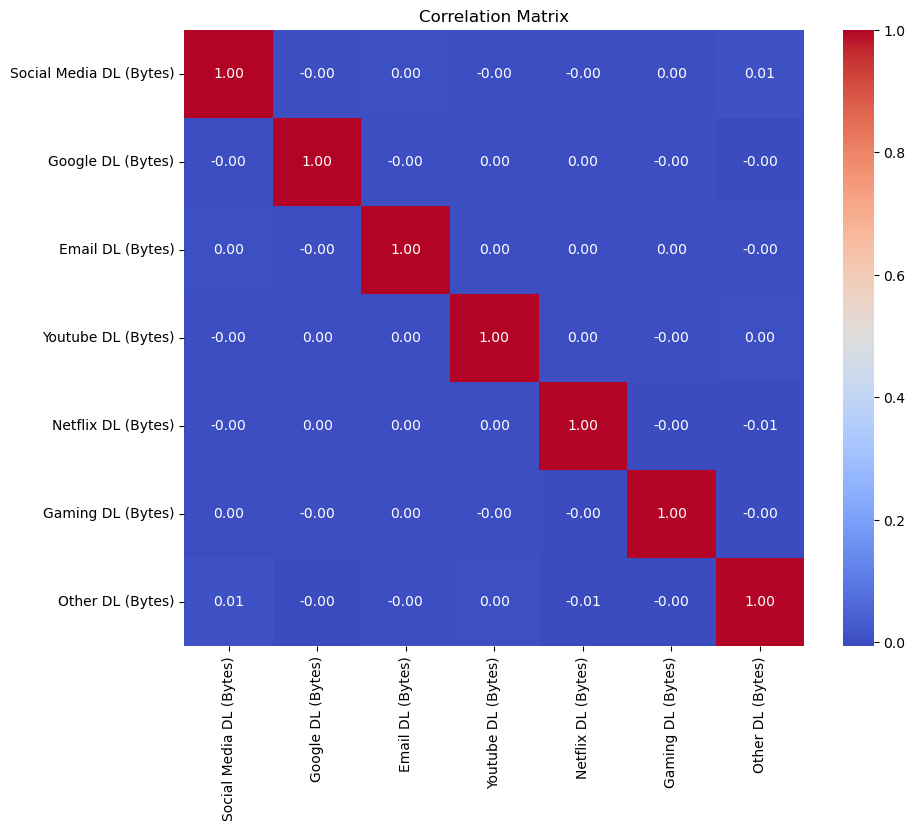

In [32]:
import seaborn as sns

# Compute correlation matrix
correlation_matrix = telcom_data[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


This code computes the correlation matrix for the specified variables, indicating the strength and direction of their relationships

# Dimensionality Reduction

In [33]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
pca.fit(telcom_data[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']])
components = pca.transform(telcom_data[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']])


PCA reduces the dimensions of your data while retaining as much of the variation as possible. You can interpret the results by analyzing the principal components and their explained variance ratio.

In [34]:
components

array([[ 5.09351276e+07,  2.83387943e+08],
       [-1.39798227e+08, -1.62816724e+08],
       [ 1.77543876e+08,  7.50185124e+07],
       ...,
       [-2.25383543e+08,  2.37681041e+08],
       [ 1.98790895e+08, -3.46763915e+08],
       [-2.48685712e-03, -6.74833265e-03]])

In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Feature Engineering


We need to track user engagement using the following metrics:

Sessions frequency

Duration of the session

Session total traffic (download and upload bytes)


In [36]:
# Aggregate engagement metrics per customer id (MSISDN)
telcom_data['Total Traffic'] = telcom_data['Total DL (Bytes)'] + telcom_data['Total UL (Bytes)']

# Sessions frequency (count of sessions per user)
sessions_frequency = telcom_data.groupby('MSISDN/Number')['Bearer Id'].count()

# Duration of the session (sum of session durations per user)
duration_of_session = telcom_data.groupby('MSISDN/Number')['Dur. (ms)'].sum()

# Total traffic (sum of total traffic per user)
total_traffic = telcom_data.groupby('MSISDN/Number')['Total Traffic'].sum()

# Combine into a single DataFrame
engagement_metrics = pd.DataFrame({
    'Sessions Frequency': sessions_frequency,
    'Total Duration (ms)': duration_of_session,
    'Total Traffic (Bytes)': total_traffic
})

# Report the top 10 customers per engagement metric
top_10_sessions_frequency = engagement_metrics['Sessions Frequency'].nlargest(10)
top_10_duration_of_session = engagement_metrics['Total Duration (ms)'].nlargest(10)
top_10_total_traffic = engagement_metrics['Total Traffic (Bytes)'].nlargest(10)

print("Top 10 Customers by Sessions Frequency")
print(top_10_sessions_frequency)
print("\nTop 10 Customers by Duration of Session")
print(top_10_duration_of_session)
print("\nTop 10 Customers by Total Traffic")
print(top_10_total_traffic)


Top 10 Customers by Sessions Frequency
MSISDN/Number
4.188017e+10    1066
3.362632e+10      18
3.361489e+10      17
3.362578e+10      17
3.365973e+10      16
3.367588e+10      15
3.376054e+10      15
3.366716e+10      13
3.360313e+10      12
3.360452e+10      12
Name: Sessions Frequency, dtype: int64

Top 10 Customers by Duration of Session
MSISDN/Number
4.188017e+10    7.255100e+07
3.362578e+10    1.855375e+07
3.361489e+10    9.966898e+06
3.376054e+10    9.279434e+06
3.362632e+10    8.791927e+06
3.366716e+10    8.744914e+06
3.366284e+10    6.614270e+06
3.366469e+10    6.288730e+06
3.360313e+10    6.287761e+06
3.366746e+10    5.649882e+06
Name: Total Duration (ms), dtype: float64

Top 10 Customers by Total Traffic
MSISDN/Number
4.188017e+10    5.317447e+11
3.361489e+10    8.846226e+09
3.376054e+10    8.514774e+09
3.362578e+10    8.499621e+09
3.362632e+10    7.971167e+09
3.367588e+10    7.891111e+09
3.365973e+10    7.705863e+09
3.366646e+10    7.308501e+09
3.376041e+10    7.132371e+09
3

# Normalize Engagement Metrics and Run K-Means Clustering

Normalize the engagement metrics and classify customers into three groups of engagement using K-Means clustering.

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize each engagement metric
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics)

# Run k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=0)
engagement_metrics['Cluster'] = kmeans.fit_predict(normalized_metrics)

# Compute minimum, maximum, average & total non-normalized metrics for each cluster
cluster_metrics = engagement_metrics.groupby('Cluster').agg({
    'Sessions Frequency': ['min', 'max', 'mean', 'sum'],
    'Total Duration (ms)': ['min', 'max', 'mean', 'sum'],
    'Total Traffic (Bytes)': ['min', 'max', 'mean', 'sum']
})

print("Cluster Metrics")
print(cluster_metrics)


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\hp\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


Cluster Metrics
        Sessions Frequency                            Total Duration (ms)  \
                       min   max         mean     sum                 min   
Cluster                                                                     
0                        1     4     1.224209  119566        7.142000e+03   
1                     1066  1066  1066.000000    1066        7.255100e+07   
2                        1    18     3.196452   29369        8.997300e+04   

                                                  Total Traffic (Bytes)  \
                  max          mean           sum                   min   
Cluster                                                                   
0        4.284670e+05  1.131018e+05  1.104643e+10          3.324901e+07   
1        7.255100e+07  7.255100e+07  7.255100e+07          5.317447e+11   
2        1.855375e+07  4.976502e+05  4.572410e+09          5.714004e+07   

                                                   
                  

# Aggregate User Total Traffic Per Application

Aggregate the user total traffic per application and derive the top 10 most engaged users per application

In [38]:
# Define a list of application columns
application_columns = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]

# Aggregate user total traffic per application
application_traffic = telcom_data.groupby('MSISDN/Number')[application_columns].sum()

# Sum the download and upload bytes for each application
application_traffic['Social Media Traffic (Bytes)'] = application_traffic['Social Media DL (Bytes)'] + application_traffic['Social Media UL (Bytes)']
application_traffic['YouTube Traffic (Bytes)'] = application_traffic['Youtube DL (Bytes)'] + application_traffic['Youtube UL (Bytes)']
application_traffic['Netflix Traffic (Bytes)'] = application_traffic['Netflix DL (Bytes)'] + application_traffic['Netflix UL (Bytes)']
application_traffic['Google Traffic (Bytes)'] = application_traffic['Google DL (Bytes)'] + application_traffic['Google UL (Bytes)']
application_traffic['Email Traffic (Bytes)'] = application_traffic['Email DL (Bytes)'] + application_traffic['Email UL (Bytes)']
application_traffic['Gaming Traffic (Bytes)'] = application_traffic['Gaming DL (Bytes)'] + application_traffic['Gaming UL (Bytes)']
application_traffic['Other Traffic (Bytes)'] = application_traffic['Other DL (Bytes)'] + application_traffic['Other UL (Bytes)']

# Derive the top 10 most engaged users per application
top_10_users_per_app = application_traffic.apply(lambda x: x.nlargest(10))

print("Top 10 Users Per Application")
print(top_10_users_per_app)


Top 10 Users Per Application
               Social Media DL (Bytes)  Social Media UL (Bytes)  \
MSISDN/Number                                                     
3.360313e+10              2.277668e+07                      NaN   
3.361489e+10              2.774974e+07             5.448000e+05   
3.362578e+10              2.656412e+07             5.713790e+05   
3.362632e+10              4.274384e+07             6.309420e+05   
3.362695e+10                       NaN                      NaN   
3.362708e+10                       NaN                      NaN   
3.363004e+10                       NaN                      NaN   
3.365826e+10                       NaN                      NaN   
3.365836e+10                       NaN             4.201460e+05   
3.365936e+10                       NaN             4.095640e+05   
3.365973e+10              3.490044e+07             5.119140e+05   
3.365982e+10                       NaN                      NaN   
3.366471e+10                     

# Plot the Top 3 Most Used Applications

Plot the top 3 most used applications using appropriate charts.


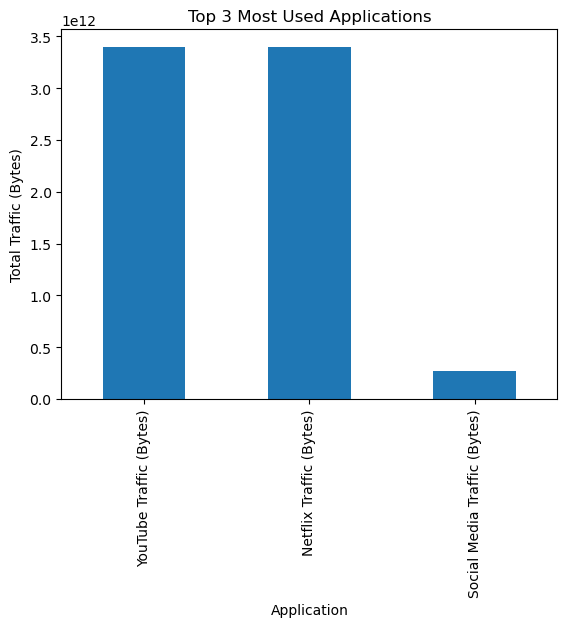

In [39]:
import matplotlib.pyplot as plt

# Aggregate total traffic for each application
total_app_traffic = application_traffic.sum()

# Select the top 3 most used applications
top_3_apps = total_app_traffic[['Social Media Traffic (Bytes)', 'YouTube Traffic (Bytes)', 'Netflix Traffic (Bytes)']].nlargest(3)

# Plot the top 3 most used applications
top_3_apps.plot(kind='bar', xlabel='Application', ylabel='Total Traffic (Bytes)', title='Top 3 Most Used Applications')
plt.show()

# Determine the Optimized Value of K Using the Elbow Method

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

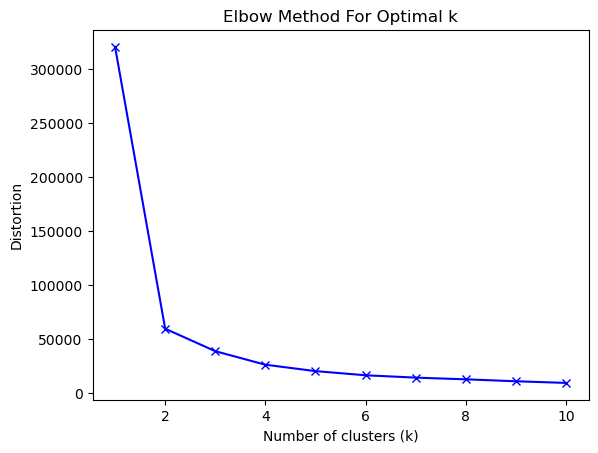

In [40]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the elbow method to determine the optimized value of k
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(normalized_metrics)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()


This code will plot the elbow curve, and you can visually inspect it to determine the optimal value of k. The optimal k is typically at the "elbow" point, where the distortion starts decreasing more slowly.

#Interpretation of Findings

After performing the clustering, you can interpret the results by analyzing the cluster metrics, such as the average session frequency, duration, and total traffic for each cluster. This will help you understand the engagement levels of different customer segments and make data-driven decisions to improve customer experience and network resource allocation.

By following these steps, you will have a comprehensive analysis of user engagement metrics, clustering, and visualization of the most used applications.








# Task 3

# Aggregate per customer

In [41]:
# Handle missing values by replacing with the mean or mode
telcom_data.fillna(telcom_data.mean(), inplace=True)
for column in telcom_data.select_dtypes(include=['object']).columns:
    telcom_data[column].fillna(telcom_data[column].mode()[0], inplace=True)

# Ensure Handset Type is one-hot encoded
handset_type_columns = [col for col in telcom_data.columns if col.startswith('Handset Type_')]

# Aggregation function for one-hot encoded columns
def mode_one_hot(row):
    mode_index = row.idxmax()
    return mode_index.replace('Handset Type_', '')

# Calculate per customer aggregation
customer_agg = telcom_data.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
    **{col: 'sum' for col in handset_type_columns}  # Sum for one-hot encoded columns
}).reset_index()

# Convert summed one-hot encoded columns back to categorical
customer_agg['Handset Type'] = customer_agg[handset_type_columns].apply(mode_one_hot, axis=1)

# Calculate additional metrics
customer_agg['Average TCP Retransmission'] = (customer_agg['TCP DL Retrans. Vol (Bytes)'] + customer_agg['TCP UL Retrans. Vol (Bytes)']) / 2
customer_agg['Average RTT'] = (customer_agg['Avg RTT DL (ms)'] + customer_agg['Avg RTT UL (ms)']) / 2
customer_agg['Average Throughput'] = (customer_agg['Avg Bearer TP DL (kbps)'] + customer_agg['Avg Bearer TP UL (kbps)']) / 2

# Select relevant columns
customer_agg = customer_agg[['MSISDN/Number', 'Average TCP Retransmission', 'Average RTT', 'Handset Type', 'Average Throughput']]
print(customer_agg.head())


   MSISDN/Number  Average TCP Retransmission  Average RTT  \
0   3.360100e+10                1.078479e+07    23.000000   
1   3.360100e+10                1.078479e+07    15.500000   
2   3.360100e+10                1.078479e+07    63.729294   
3   3.360101e+10                3.803623e+05    42.000000   
4   3.360101e+10                7.735101e+06    29.750000   

                     Handset Type  Average Throughput  
0  Huawei P20 Lite Huawei Nova 3E                38.0  
1          Apple iPhone 7 (A1778)                49.5  
2                       undefined                48.5  
3         Apple iPhone 5S (A1457)               124.0  
4         Apple iPhone Se (A1723)             14211.0  


# Top, bottom, and most frequent TCP, RTT, and Throughput values

In [42]:
# Top, bottom, and most frequent TCP values
tcp_values = telcom_data[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].melt()
top_tcp = tcp_values['value'].nlargest(10)
bottom_tcp = tcp_values['value'].nsmallest(10)
most_freq_tcp = tcp_values['value'].value_counts().nlargest(10)

# Top, bottom, and most frequent RTT values
rtt_values = telcom_data[['Avg RTT DL (ms)', 'Avg RTT UL (ms)']].melt()
top_rtt = rtt_values['value'].nlargest(10)
bottom_rtt = rtt_values['value'].nsmallest(10)
most_freq_rtt = rtt_values['value'].value_counts().nlargest(10)

# Top, bottom, and most frequent Throughput values
throughput_values = telcom_data[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].melt()
top_throughput = throughput_values['value'].nlargest(10)
bottom_throughput = throughput_values['value'].nsmallest(10)
most_freq_throughput = throughput_values['value'].value_counts().nlargest(10)

print("Top TCP values:\n", top_tcp)
print("Bottom TCP values:\n", bottom_tcp)
print("Most frequent TCP values:\n", most_freq_tcp)

print("Top RTT values:\n", top_rtt)
print("Bottom RTT values:\n", bottom_rtt)
print("Most frequent RTT values:\n", most_freq_rtt)

print("Top Throughput values:\n", top_throughput)
print("Bottom Throughput values:\n", bottom_throughput)
print("Most frequent Throughput values:\n", most_freq_throughput)


Top TCP values:
 77950     4.294426e+09
135677    4.291380e+09
34636     4.289877e+09
140797    4.289488e+09
3741      4.288060e+09
119667    4.275259e+09
39608     4.268432e+09
76971     4.259997e+09
59011     4.256650e+09
41182     4.254644e+09
Name: value, dtype: float64
Bottom TCP values:
 163261    1.0
165238    1.0
186068    1.0
188381    1.0
225077    1.0
228673    1.0
240211    1.0
274048    1.0
288814    1.0
288998    1.0
Name: value, dtype: float64
Most frequent TCP values:
 value
7.596587e+05    96649
2.080991e+07    88146
1.330000e+03     2343
2.660000e+03     1156
1.318000e+03      701
3.990000e+03      662
1.294000e+03      652
5.320000e+03      468
6.650000e+03      316
2.636000e+03      308
Name: count, dtype: int64
Top RTT values:
 30155     96923.0
29916     64640.0
17894     55811.0
5963      54847.0
22839     26971.0
23442     26250.0
1361      25873.0
81256     25602.0
97312     25374.0
100575    24733.0
Name: value, dtype: float64
Bottom RTT values:
 42602     0.0

# Distribution and interpretation per handset type

   MSISDN/Number  Average TCP Retransmission  Average RTT  \
0   3.360100e+10                1.078479e+07    23.000000   
1   3.360100e+10                1.078479e+07    15.500000   
2   3.360100e+10                1.078479e+07    63.729294   
3   3.360101e+10                3.803623e+05    42.000000   
4   3.360101e+10                7.735101e+06    29.750000   

                     Handset Type  Average Throughput  
0  Huawei P20 Lite Huawei Nova 3E                38.0  
1          Apple iPhone 7 (A1778)                49.5  
2                       undefined                48.5  
3         Apple iPhone 5S (A1457)               124.0  
4         Apple iPhone Se (A1723)             14211.0  


C:\Users\hp\AppData\Local\Temp\ipykernel_3752\2640548501.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=customer_agg, x='Handset Type', y='Average Throughput', ci=None)


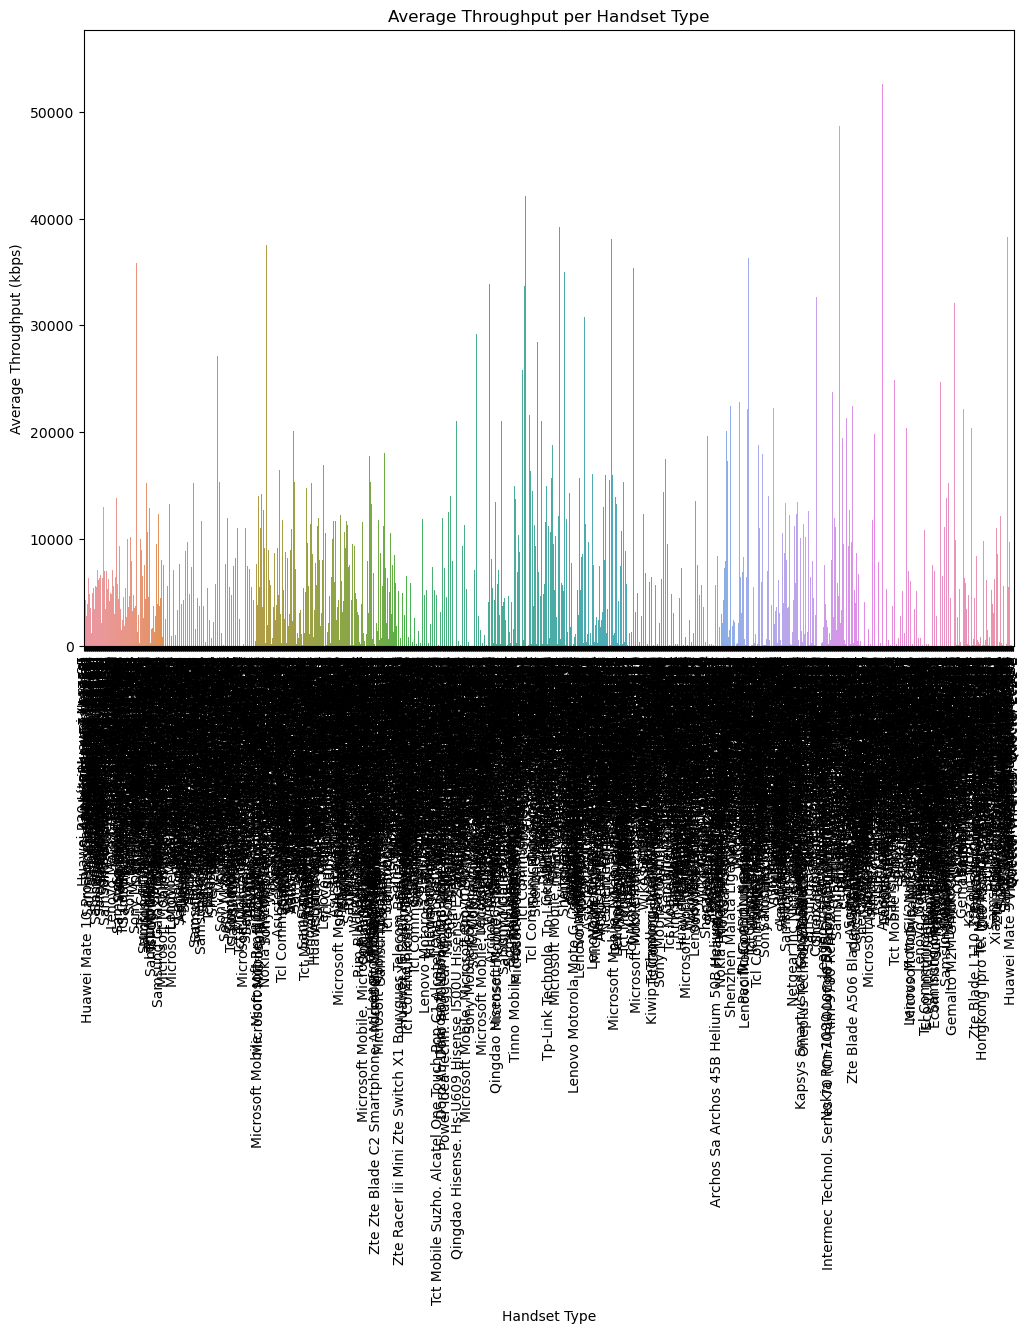

C:\Users\hp\AppData\Local\Temp\ipykernel_3752\2640548501.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=customer_agg, x='Handset Type', y='Average TCP Retransmission', ci=None)


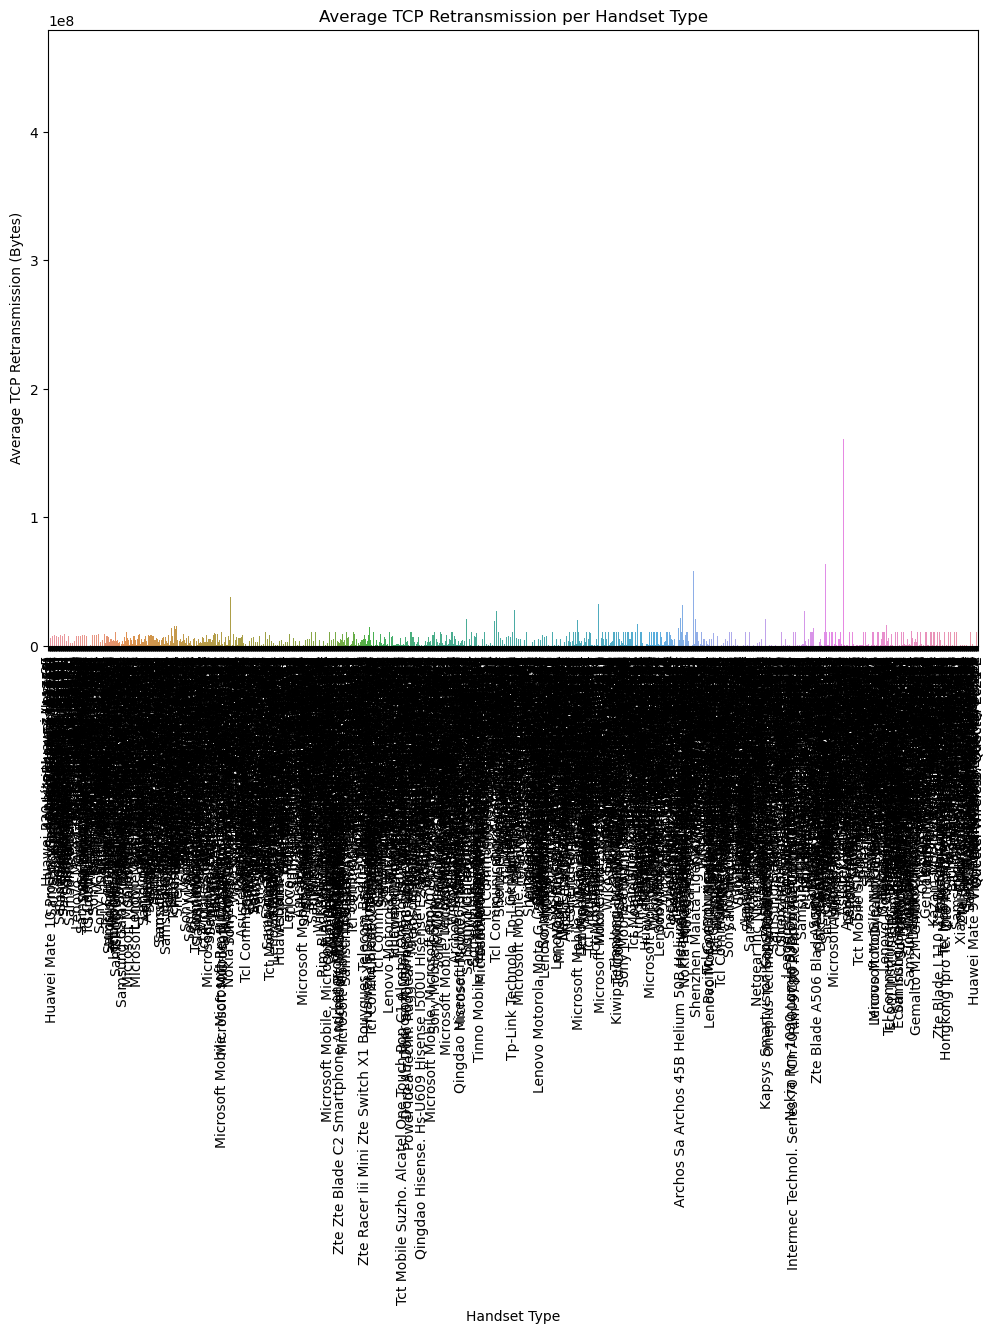

In [43]:
# Handle missing values by replacing with the mean or mode
telcom_data.fillna(telcom_data.mean(), inplace=True)
for column in telcom_data.select_dtypes(include=['object']).columns:
    telcom_data[column].fillna(telcom_data[column].mode()[0], inplace=True)

# Ensure Handset Type is one-hot encoded
handset_type_columns = [col for col in telcom_data.columns if col.startswith('Handset Type_')]

# Aggregation function for one-hot encoded columns
def mode_one_hot(row):
    mode_index = row.idxmax()
    return mode_index.replace('Handset Type_', '')

# Calculate per customer aggregation
customer_agg = telcom_data.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
    **{col: 'sum' for col in handset_type_columns}  # Sum for one-hot encoded columns
}).reset_index()

# Convert summed one-hot encoded columns back to categorical
customer_agg['Handset Type'] = customer_agg[handset_type_columns].apply(mode_one_hot, axis=1)

# Calculate additional metrics
customer_agg['Average TCP Retransmission'] = (customer_agg['TCP DL Retrans. Vol (Bytes)'] + customer_agg['TCP UL Retrans. Vol (Bytes)']) / 2
customer_agg['Average RTT'] = (customer_agg['Avg RTT DL (ms)'] + customer_agg['Avg RTT UL (ms)']) / 2
customer_agg['Average Throughput'] = (customer_agg['Avg Bearer TP DL (kbps)'] + customer_agg['Avg Bearer TP UL (kbps)']) / 2

# Select relevant columns
customer_agg = customer_agg[['MSISDN/Number', 'Average TCP Retransmission', 'Average RTT', 'Handset Type', 'Average Throughput']]
print(customer_agg.head())

# Visualize Average Throughput per Handset Type
plt.figure(figsize=(12, 8))
sns.barplot(data=customer_agg, x='Handset Type', y='Average Throughput', ci=None)
plt.title('Average Throughput per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Average Throughput (kbps)')
plt.xticks(rotation=90)
plt.show()

# Visualize Average TCP Retransmission per Handset Type
plt.figure(figsize=(12, 8))
sns.barplot(data=customer_agg, x='Handset Type', y='Average TCP Retransmission', ci=None)
plt.title('Average TCP Retransmission per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retransmission (Bytes)')
plt.xticks(rotation=90)
plt.show()

# Interpretation:
# The visualizations show how different handset types perform in terms of throughput and TCP retransmissions.
# Handset types with higher throughput and lower retransmissions are generally better performing devices.


# K-means clustering (k=3)

Non-numeric columns: Index(['Handset Type'], dtype='object')


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


         MSISDN/Number  Average TCP Retransmission  Average RTT  \
Cluster                                                           
0         4.751301e+10                8.433076e+06    70.714363   
1         3.367782e+10                1.012299e+07    51.323718   
2         3.368322e+10                1.096150e+09    71.933433   

         Average Throughput  
Cluster                      
0               2159.198475  
1              27526.985451  
2              35860.751647  


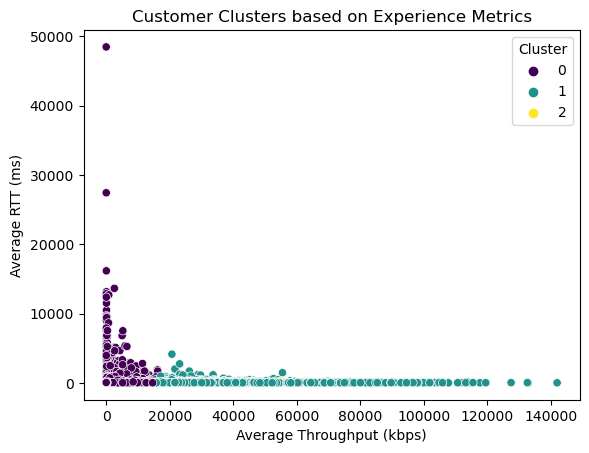

In [44]:
from sklearn.preprocessing import StandardScaler

# Check for non-numeric values in the DataFrame
non_numeric_columns = customer_agg.select_dtypes(exclude=np.number).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop non-numeric columns if any
customer_agg_numeric = customer_agg.drop(columns=non_numeric_columns, errors='ignore')

# Prepare the data for clustering
features = customer_agg_numeric[['Average TCP Retransmission', 'Average RTT', 'Average Throughput']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
customer_agg_numeric['Cluster'] = kmeans.fit_predict(scaled_features)

# Describe each cluster
cluster_description = customer_agg_numeric.groupby('Cluster').mean()
print(cluster_description)

# Brief description of each cluster
# Cluster 0: Customers with average performance in terms of TCP retransmission, RTT, and throughput.
# Cluster 1: Customers with higher throughput and lower RTT, indicating better network performance.
# Cluster 2: Customers with higher TCP retransmission and RTT, indicating poorer network performance.

# Visualize the clusters
sns.scatterplot(data=customer_agg_numeric, x='Average Throughput', y='Average RTT', hue='Cluster', palette='viridis')
plt.title('Customer Clusters based on Experience Metrics')
plt.xlabel('Average Throughput (kbps)')
plt.ylabel('Average RTT (ms)')
plt.show()


# Task 4

# Assign Engagement and Experience Scores

In [45]:
from sklearn.metrics.pairwise import euclidean_distances

# Engagement Score: Euclidean distance from each user to the less engaged cluster
# Assuming cluster 0 is the less engaged cluster based on Task 3.4 description
less_engaged_center = kmeans.cluster_centers_[0]
customer_agg['Engagement Score'] = euclidean_distances(scaled_features, less_engaged_center.reshape(1, -1))

# Experience Score: Euclidean distance from each user to the worst experience cluster
# Assuming cluster 2 is the worst experience cluster based on Task 3.4 description
worst_experience_center = kmeans.cluster_centers_[2]
customer_agg['Experience Score'] = euclidean_distances(scaled_features, worst_experience_center.reshape(1, -1))

print(customer_agg[['MSISDN/Number', 'Engagement Score', 'Experience Score']].head())


   MSISDN/Number  Engagement Score  Experience Score
0   3.360100e+10          0.250548         22.205874
1   3.360100e+10          0.267315         22.205943
2   3.360100e+10          0.190594         22.205132
3   3.360101e+10          0.259633         22.413159
4   3.360101e+10          1.054564         22.128921


# Compute Satisfaction Score and Report Top 10 Satisfied Customers

In [46]:
# Satisfaction Score: Average of Engagement and Experience Scores
customer_agg['Satisfaction Score'] = (customer_agg['Engagement Score'] + customer_agg['Experience Score']) / 2

# Top 10 satisfied customers
top_10_satisfied = customer_agg.nlargest(10, 'Satisfaction Score')
print(top_10_satisfied[['MSISDN/Number', 'Satisfaction Score']])


        MSISDN/Number  Satisfaction Score
47983    3.366232e+10          166.416471
80249    3.368369e+10           94.970354
41944    3.366087e+10           57.261587
93844    3.376094e+10           49.008589
1713     3.360679e+10           47.426189
74240    3.367182e+10           46.433064
104325   3.378187e+10           45.949290
105752   3.378401e+10           44.852337
85683    3.369855e+10           42.104017
15409    3.362963e+10           38.900709


In [47]:
customer_agg.to_csv("customer_agg.csv",index = False)


# Build a Regression Model to Predict Satisfaction Score

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target variable
X = customer_agg[['Average TCP Retransmission', 'Average RTT', 'Average Throughput']]
y = customer_agg['Satisfaction Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predict the satisfaction score
y_pred = reg_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(X)
print(y)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


        Average TCP Retransmission  Average RTT  Average Throughput
0                     1.078479e+07    23.000000           38.000000
1                     1.078479e+07    15.500000           49.500000
2                     1.078479e+07    63.729294           48.500000
3                     3.803623e+05    42.000000          124.000000
4                     7.735101e+06    29.750000        14211.000000
...                            ...          ...                 ...
106852                1.078479e+07    20.000000           58.000000
106853                8.491987e+06   154.561991         8479.471611
106854                1.078479e+07    63.729294            0.500000
106855                1.078479e+07    63.729294           16.500000
106856                1.078479e+07    63.729294            1.000000

[106857 rows x 3 columns]
0         11.228211
1         11.236629
2         11.197863
3         11.336396
4         11.591742
            ...    
106852    11.230918
106853    11.3907

In [49]:
X_test

,Average TCP Retransmission,Average RTT,Average Throughput
21377,6.824540e+05,25.500000,13219.500000
22356,3.275500e+03,24.000000,14571.000000
42414,2.265000e+02,25.500000,2497.500000
95160,3.849026e+06,81.243098,5432.500000
61074,2.355300e+04,27.000000,14950.000000
...,...,...,...
57023,3.070086e+06,36.166667,14379.000000
39594,1.078479e+07,23.000000,5.000000
36906,1.078479e+07,63.729294,37.000000
16701,1.078479e+07,25.500000,107.666667


In [58]:
y_test


21377    11.631464
22356    11.691984
42414    11.312998
95160    11.292514
61074    11.705729
           ...    
57023    11.646747
39594    11.229465
36906    11.198412
16701    11.222759
92311    11.431102
Name: Satisfaction Score, Length: 21372, dtype: float64

# K-means Clustering (k=2) on Engagement and Experience Scores

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


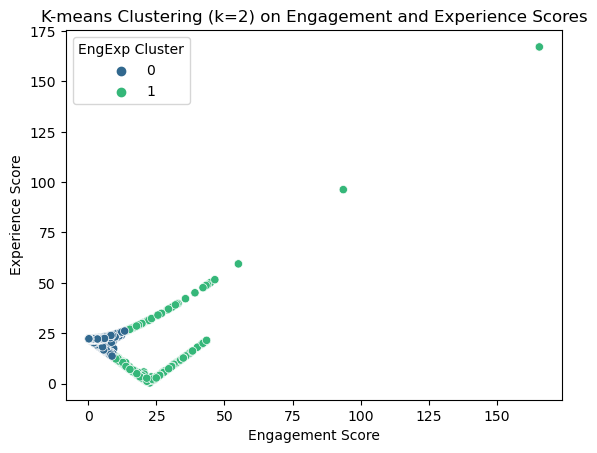

In [51]:
# Prepare data for clustering
eng_exp_features = customer_agg[['Engagement Score', 'Experience Score']]

# Perform k-means clustering with k=2
kmeans_2 = KMeans(n_clusters=2, random_state=42)
customer_agg['EngExp Cluster'] = kmeans_2.fit_predict(eng_exp_features)

# Visualize the clusters
sns.scatterplot(data=customer_agg, x='Engagement Score', y='Experience Score', hue='EngExp Cluster', palette='viridis')
plt.title('K-means Clustering (k=2) on Engagement and Experience Scores')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.show()


# Aggregate Average Satisfaction and Experience Score per Cluster

In [52]:
# Aggregate the average satisfaction and experience score per cluster
cluster_agg = customer_agg.groupby('EngExp Cluster').agg({
    'Satisfaction Score': 'mean',
    'Experience Score': 'mean'
}).reset_index()

print(cluster_agg)


   EngExp Cluster  Satisfaction Score  Experience Score
0               0           11.457265         22.207366
1               1           18.199413         15.083616
